<h1> Statistical Data Analysis

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
from scipy.stats import linregress 

In [10]:
from scipy.stats import spearmanr

In [11]:
import researchpy as rp

In [12]:
## Importing csv files into panda DataFrames

In [13]:
filenameTeam = '/Users/Rezalution/Desktop/nfl-scores-and-betting-data/nfl_teams.csv'
filenameStadiums = '/Users/Rezalution/Desktop/nfl-scores-and-betting-data/nfl_stadiums.csv'
filenameGames = '/Users/Rezalution/Desktop/nfl-scores-and-betting-data/spreadspoke_scores.csv'

In [14]:
nflTeams = pd.read_csv(filenameTeam,encoding ='latin1')
nflStadiums = pd.read_csv(filenameStadiums,encoding ='latin1')
nflGames = pd.read_csv(filenameGames,encoding ='latin1')

In [15]:
nflTeams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central


In [16]:
nflStadiumsCleaned = nflStadiums.drop(columns=['stadium_open','stadium_close','stadium_address','stadium_weather_station_code','stadium_capacity','STATION','NAME','LATITUDE','LONGITUDE'])

In [17]:
nflStadiumsCleaned[pd.isnull(nflStadiumsCleaned['stadium_type'])]

,stadium_name,stadium_location,stadium_type,stadium_weather_type,stadium_surface,ELEVATION
1,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN
16,Dolphin Stadium,"Miami, FL",NaN,NaN,NaN,NaN
35,Jack Murphy Stadium,"San Diego, CA",NaN,NaN,NaN,NaN
36,Joe Robbie Stadium,"Miami, FL",NaN,NaN,NaN,NaN
65,Pro Player Stadium,"Miami, FL",NaN,NaN,NaN,NaN
79,Stanford Stadium,"Palo Alto, CA",NaN,NaN,NaN,NaN
83,Tampa Stadium,"Tampa, FL",NaN,NaN,NaN,NaN


In [18]:
nflGamesCleaned = nflGames.drop(columns=['over_under_line','spread_favorite','weather_detail'])

In [19]:
nflGamesCleaned = nflGamesCleaned.dropna(axis=0,subset=['weather_temperature'])

In [20]:
nflGamesCleaned = nflGamesCleaned.dropna(axis=0,subset=['score_home'])

In [21]:
stadiumTypes = nflStadiumsCleaned['stadium_type'].value_counts()

In [22]:
stadiumWeatherTypes = nflStadiumsCleaned['stadium_weather_type'].value_counts()

In [23]:
gamesStadiums = pd.merge(nflGamesCleaned,nflStadiumsCleaned,how='left',left_on='stadium',right_on='stadium_name')

In [24]:
nullStadiums = gamesStadiums[pd.isnull(gamesStadiums['stadium_name'])]

In [25]:
gamesStadiums['scoreDiff'] = gamesStadiums['score_home'] - gamesStadiums['score_away']

In [26]:
gamesStadiums['homeWin'] = gamesStadiums['scoreDiff'].apply(lambda x: 1 if x > 0 else 0)

In [27]:
gamesStadiums['AwayWin'] = gamesStadiums['scoreDiff'].apply(lambda x: 1 if x < 0 else 0)

In [28]:
gamesStadiums['weather_temperatureRounded'] = gamesStadiums['weather_temperature'] // 10 * 10

In [29]:
gamesStadiums['schedule_season'] = gamesStadiums['schedule_season'] // 10 * 10

In [165]:
gamesStadiums['games'] = 1

In [168]:
gamesStadiums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11878 entries, 0 to 11877
Data columns (total 25 columns):
schedule_date                 11878 non-null object
schedule_season               11878 non-null int64
schedule_week                 11878 non-null object
schedule_playoff              11878 non-null bool
team_home                     11878 non-null object
score_home                    11878 non-null float64
score_away                    11878 non-null float64
team_away                     11878 non-null object
team_favorite_id              9629 non-null object
stadium                       11878 non-null object
stadium_neutral               11878 non-null bool
weather_temperature           11878 non-null float64
weather_wind_mph              11878 non-null float64
weather_humidity              8388 non-null object
stadium_name                  11673 non-null object
stadium_location              11673 non-null object
stadium_type                  11673 non-null object
stadium_we

In [31]:
gamesStadiums[['stadium_type','weather_temperature']].groupby(['stadium_type']).describe()

weather_temperature                                          \
                           count       mean        std   min   25%   50%   
stadium_type                                                               
indoor                    1986.0  72.000000   0.000000  72.0  72.0  72.0   
outdoor                   9164.0  54.985596  15.633036  -6.0  44.0  56.0   
retractable                523.0  71.053537   7.861164  26.0  72.0  72.0   

                          
               75%   max  
stadium_type              
indoor        72.0  72.0  
outdoor       66.0  97.0  
retractable   72.0  92.0

In [32]:
gamesStadiumsPivot = gamesStadiums[['weather_temperatureRounded','stadium_type','scoreDiff']]

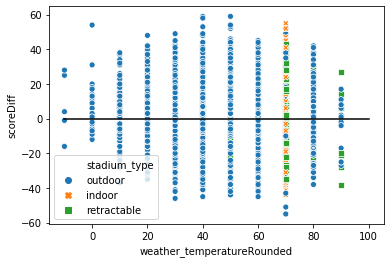

In [33]:
sns.scatterplot(x='weather_temperatureRounded',y='scoreDiff',hue='stadium_type',style='stadium_type',data=gamesStadiumsPivot)
plt.plot([100,-10],[0,0],'k-')

In [34]:
gamesStadiumsPivot.groupby(['weather_temperatureRounded','stadium_type']).mean()

scoreDiff
weather_temperatureRounded stadium_type           
-10.0                      outdoor        8.000000
 0.0                       outdoor        6.470588
 10.0                      outdoor        4.620000
 20.0                      outdoor        4.163212
                           retractable    6.000000
 30.0                      outdoor        3.643721
                           retractable    1.000000
 40.0                      outdoor        3.314413
                           retractable    5.000000
 50.0                      outdoor        3.210188
                           retractable   -1.461538
 60.0                      outdoor        2.785781
                           retractable   -0.214286
 70.0                      indoor         1.984391
                           outdoor        2.413257
                           retractable    1.696104
 80.0                      outdoor        2.378378
                           retractable    0.400000
 90.0                      outdoor       -3.692308
                           retractable   -5.777778

In [35]:
gamesStadiumsPivot.groupby('stadium_type').mean()

,weather_temperatureRounded,scoreDiff
stadium_type,,
indoor,70.000000,1.984391
outdoor,50.534701,3.093736
retractable,68.298279,1.124283


In [36]:
gamesStadiumsOutdoors = gamesStadiums[gamesStadiums['stadium_type'] == 'outdoor']

In [37]:
gamesStadiumsOutdoors['weather_temperatureRounded'].value_counts()

 50.0    2179
 60.0    2138
 40.0    1568
 70.0    1222
 30.0    1075
 80.0     444
 20.0     386
 10.0     100
 0.0       34
 90.0      13
-10.0       5
Name: weather_temperatureRounded, dtype: int64

In [38]:
gamesStadiumsOutdoors = gamesStadiumsOutdoors.pivot_table(index='weather_temperatureRounded',values='scoreDiff',aggfunc=np.mean)

In [39]:
gamesStadiumsOutdoors

,scoreDiff
weather_temperatureRounded,
-10.0,8.000000
0.0,6.470588
10.0,4.620000
20.0,4.163212
30.0,3.643721
40.0,3.314413
50.0,3.210188
60.0,2.785781
70.0,2.413257


In [169]:
homeWins = gamesStadiums[['homeWin','AwayWin','schedule_season','stadium_type','weather_temperature','weather_temperatureRounded','weather_humidity','weather_wind_mph','score_home','score_away','scoreDiff']]

In [170]:
homeWins[homeWins['stadium_type'] == 'outdoor']

,homeWin,AwayWin,schedule_season,stadium_type,weather_temperature,weather_temperatureRounded,weather_humidity,weather_wind_mph,score_home,score_away,scoreDiff
0,0,1,1960,outdoor,83.0,80.0,71,6.0,14.0,23.0,-9.0
1,1,0,1960,outdoor,81.0,80.0,70,7.0,45.0,7.0,38.0
2,1,0,1960,outdoor,70.0,70.0,82,7.0,27.0,7.0,20.0
3,0,1,1960,outdoor,82.0,80.0,78,11.0,14.0,19.0,-5.0
4,1,0,1960,outdoor,64.0,60.0,62,8.0,24.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
11870,0,1,2010,outdoor,39.0,30.0,NaN,12.0,15.0,16.0,-1.0
11871,1,0,2010,outdoor,32.0,30.0,NaN,13.0,31.0,13.0,18.0
11872,1,0,2010,outdoor,57.0,50.0,NaN,1.0,30.0,22.0,8.0
11873,1,0,2010,outdoor,26.0,20.0,NaN,3.0,41.0,28.0,13.0


In [171]:
homeWins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11878 entries, 0 to 11877
Data columns (total 11 columns):
homeWin                       11878 non-null int64
AwayWin                       11878 non-null int64
schedule_season               11878 non-null int64
stadium_type                  11673 non-null object
weather_temperature           11878 non-null float64
weather_temperatureRounded    11878 non-null float64
weather_humidity              8388 non-null object
weather_wind_mph              11878 non-null float64
score_home                    11878 non-null float64
score_away                    11878 non-null float64
scoreDiff                     11878 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.1+ MB


In [172]:
homeWinsHumidity = homeWins.dropna(axis=0,subset=['weather_humidity'])

In [173]:
homeWinsHumidity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 10541
Data columns (total 11 columns):
homeWin                       8388 non-null int64
AwayWin                       8388 non-null int64
schedule_season               8388 non-null int64
stadium_type                  8240 non-null object
weather_temperature           8388 non-null float64
weather_temperatureRounded    8388 non-null float64
weather_humidity              8388 non-null object
weather_wind_mph              8388 non-null float64
score_home                    8388 non-null float64
score_away                    8388 non-null float64
scoreDiff                     8388 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 786.4+ KB


In [174]:
homeWinsHumidity['weather_humidity'] = homeWinsHumidity['weather_humidity'].astype(str).str.extract('(\d+)').astype(float)

/Users/Rezalution/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
homeWinsHumidity = homeWinsHumidity.dropna(axis=0,subset=['weather_humidity'])

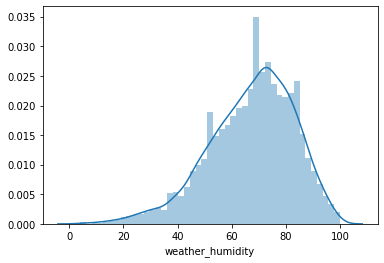

In [176]:
sns.distplot(homeWinsHumidity['weather_humidity'])

In [177]:
homeWinsHumidity[homeWinsHumidity['weather_humidity'] == 100]

,homeWin,AwayWin,schedule_season,stadium_type,weather_temperature,weather_temperatureRounded,weather_humidity,weather_wind_mph,score_home,score_away,scoreDiff
7827,0,1,2000,outdoor,35.0,30.0,100.0,10.0,26.0,30.0,-4.0
7865,1,0,2000,outdoor,40.0,40.0,100.0,15.0,20.0,10.0,10.0
9526,0,1,2010,outdoor,73.0,70.0,100.0,1.0,9.0,10.0,-1.0
10245,0,1,2010,outdoor,37.0,30.0,100.0,5.0,34.0,41.0,-7.0
10308,1,0,2010,outdoor,62.0,60.0,100.0,4.0,38.0,20.0,18.0
10357,0,1,2010,outdoor,69.0,60.0,100.0,9.0,21.0,36.0,-15.0
10442,1,0,2010,outdoor,61.0,60.0,100.0,2.0,27.0,13.0,14.0
10534,1,0,2010,outdoor,41.0,40.0,100.0,8.0,34.0,20.0,14.0
10536,1,0,2010,outdoor,42.0,40.0,100.0,5.0,20.0,6.0,14.0


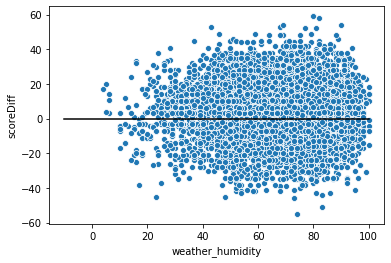

In [178]:
sns.scatterplot(x='weather_humidity',y='scoreDiff',data=homeWinsHumidity)
plt.plot([100,-10],[0,0],'k-')

In [179]:
homeWinsHumidity['weather_humidityRounded'] = homeWinsHumidity['weather_humidity'] // 10 * 10

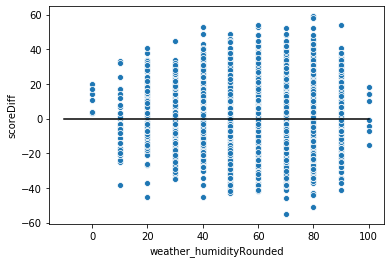

In [180]:
sns.scatterplot(x='weather_humidityRounded',y='scoreDiff',data=homeWinsHumidity)
plt.plot([100,-10],[0,0],'k-')

In [181]:
homeWinsHumidity['weather_humidityRounded'].value_counts()

70.0     2183
60.0     1824
80.0     1498
50.0     1303
40.0      670
90.0      453
30.0      267
20.0      129
10.0       46
100.0       9
0.0         6
Name: weather_humidityRounded, dtype: int64

In [182]:
slope, intercept, r_value, p_value, std_err = linregress(homeWinsHumidity['scoreDiff'],homeWinsHumidity['weather_humidityRounded'])
slope, intercept, r_value, p_value, std_err

(0.0051559497920331265,
 62.78363945803852,
 0.004806812174890256,
 0.659811267608515,
 0.011713025282884416)

In [183]:
spearmanr(homeWinsHumidity['scoreDiff'],homeWinsHumidity['weather_humidityRounded'])

SpearmanrResult(correlation=-0.0013256983844779232, pvalue=0.9033762729523585)

In [184]:
homeWinsHumidityPivot = homeWinsHumidity.pivot_table(index='weather_humidityRounded',values='scoreDiff',aggfunc=np.mean)

In [185]:
homeWinsHumidityPivot

,scoreDiff
weather_humidityRounded,
0.0,11.500000
10.0,-3.565217
20.0,4.403101
30.0,1.775281
40.0,3.562687
50.0,2.705295
60.0,3.678728
70.0,2.449840
80.0,3.410547


In [186]:
spearmanr(homeWinsHumidityPivot.index,homeWinsHumidityPivot['scoreDiff'])

SpearmanrResult(correlation=0.045454545454545456, pvalue=0.8944269969053026)

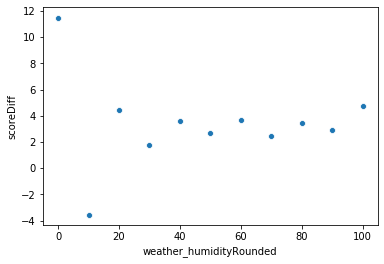

In [187]:
sns.scatterplot(x=homeWinsHumidityPivot.index,y='scoreDiff',data=homeWinsHumidityPivot)

The graph for humidity vs score difference means show no trend in any particular way to imply any correlation between the two. 

In [188]:
homeWinsHumidityTemp = homeWinsHumidity[['weather_humidityRounded','weather_temperatureRounded','scoreDiff']]

In [189]:
homeWinsHumidityTemp

,weather_humidityRounded,weather_temperatureRounded,scoreDiff
0,70.0,80.0,-9.0
1,70.0,80.0,38.0
2,80.0,70.0,20.0
3,70.0,80.0,-5.0
4,60.0,60.0,21.0
...,...,...,...
10537,10.0,70.0,-20.0
10538,90.0,40.0,13.0
10539,10.0,70.0,3.0
10540,90.0,40.0,18.0


In [190]:
homeWinsHumidityTempPivot = homeWinsHumidityTemp.pivot_table(index='weather_temperatureRounded',columns='weather_humidityRounded',values='scoreDiff',aggfunc=np.mean)

In [191]:
homeWinsHumidityTempPivot

weather_humidityRounded,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
weather_temperatureRounded,,,,,,,,,,,
-10.0,NaN,NaN,NaN,NaN,NaN,10.250000,NaN,NaN,NaN,NaN,NaN
0.0,15.0,NaN,NaN,NaN,-3.000000,2.833333,11.545455,4.375000,1.333333,NaN,NaN
10.0,NaN,NaN,NaN,NaN,1.000000,-2.600000,4.321429,6.578947,6.500000,17.000000,NaN
20.0,NaN,NaN,3.000000,-4.800000,4.470588,5.828571,4.688312,4.371134,3.614035,-5.000000,NaN
30.0,NaN,-4.000000,4.000000,2.086957,3.635417,2.770115,5.880658,0.288889,5.438272,3.686275,-5.500000
40.0,NaN,-8.333333,3.615385,2.957447,3.480769,3.064748,2.478261,3.300000,3.434978,4.609524,12.666667
50.0,4.0,-3.000000,5.187500,2.396825,3.115607,2.531532,3.903371,2.565126,3.107817,4.086667,NaN
60.0,NaN,-1.166667,2.846154,2.689189,4.890909,2.101215,3.037647,2.095238,3.383292,1.663158,5.666667
70.0,3.0,-2.250000,8.095238,-0.029412,2.687500,3.773050,3.589520,1.777778,2.532110,-4.828571,-1.000000


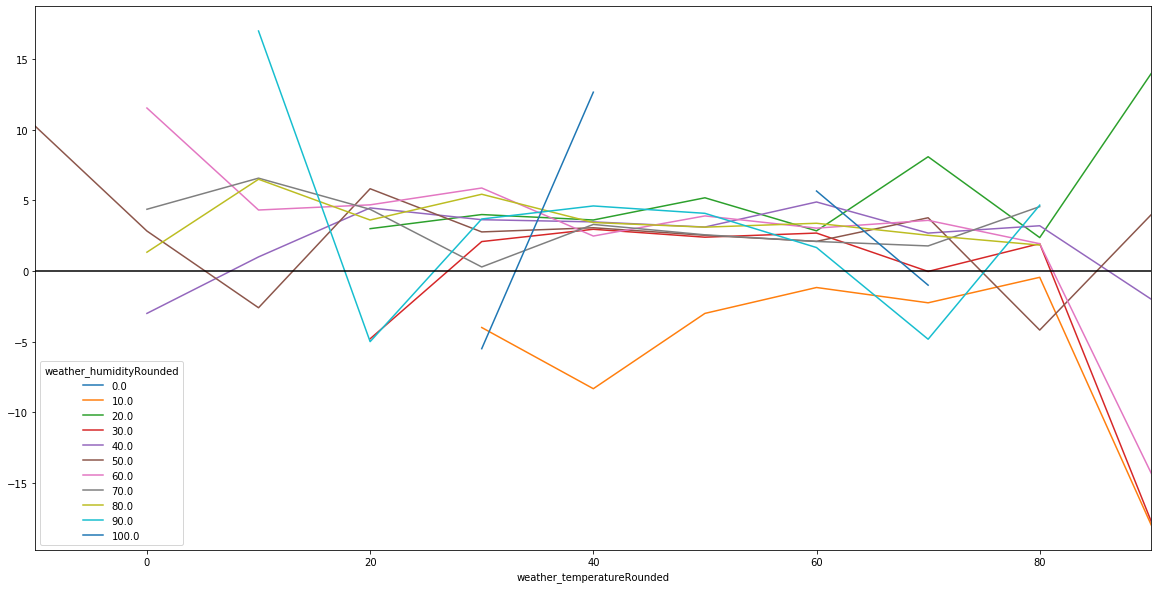

In [192]:
homeWinsHumidityTempPivot.plot(figsize=(20, 10));
plt.plot([100,-10],[0,0],'k-')

A majority of the lines are above the 0 score difference line. This implies that the home team score more than the away team resulting in a win for the home team. One outlier is when humidty was in the 10s, the away team scored more in all temperatures. Also the away team scored more than the home team at temperatures greater than 80 when the humidity was in the 30s, 60s, and 10s like stated above. A majority of the differences are at the two polar ends of the temperature range. When temperatures are around 0 degress and greater than 80 degress, the score difference diverts greatly from the middle. 

<h3> Temperature vs Score

In [193]:
spearmanr(homeWins['score_home'],homeWins['weather_temperature'])

SpearmanrResult(correlation=0.0042222644688348085, pvalue=0.6454284092004128)

In [194]:
slope, intercept, r_value, p_value, std_err = linregress(homeWins['score_home'],homeWins['weather_temperature'])
slope, intercept, r_value, p_value, std_err

(0.0040273979243054675,
 58.46616203222529,
 0.0027290123342187823,
 0.7661656940640897,
 0.013541985102146176)

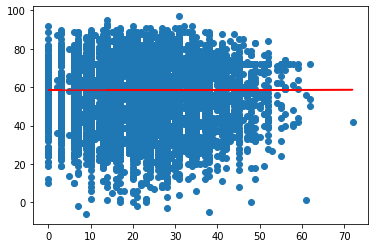

In [195]:
plt.plot(homeWins['score_home'], homeWins['weather_temperature'], 'o', label='original data')
plt.plot(homeWins['score_home'], intercept + slope*homeWins['score_home'], 'r', label='fitted line')

In [196]:
spearmanr(homeWins['score_away'],homeWins['weather_temperature'])

SpearmanrResult(correlation=0.06587234393445161, pvalue=6.660535158362897e-13)

In [197]:
slope, intercept, r_value, p_value, std_err = linregress(homeWins['score_away'],homeWins['weather_temperature'])
slope, intercept, r_value, p_value, std_err

(0.10194282250049275,
 56.5643175747698,
 0.06638427739992205,
 4.414628366617826e-13,
 0.01406038692476114)

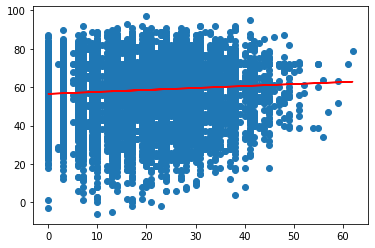

In [198]:
plt.plot(homeWins['score_away'], homeWins['weather_temperature'], 'o', label='original data')
plt.plot(homeWins['score_away'], intercept + slope*homeWins['score_away'], 'r', label='fitted line')

There is a greater correlation with away team scores (0.066) and weather temperature than home team scores (0.003), though the correlation is still a weak one since the r value is less than 0.2. This implies that when temperatures increase there is a slight correlation that the away team score will also increase, and when temperatures decrease the away team score will decrease. Therefore away teams may have a harder time playing in colder temperatures, though the correlation is very small.

<h3> Humidity vs Score

In [199]:
spearmanr(homeWinsHumidity['score_home'],homeWinsHumidity['weather_humidity'])

SpearmanrResult(correlation=-0.02243538343039265, pvalue=0.039906060638367505)

In [200]:
slope, intercept, r_value, p_value, std_err = linregress(homeWinsHumidity['score_home'],homeWinsHumidity['weather_humidity'])
slope, intercept, r_value, p_value, std_err

(-0.02377389427232223,
 67.7400701716278,
 -0.015918868689775375,
 0.14488989084131948,
 0.01630630882696542)

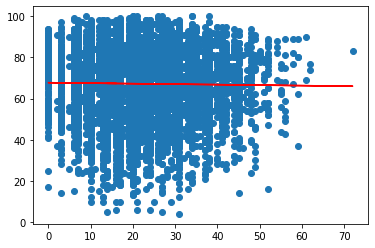

In [201]:
plt.plot(homeWinsHumidity['score_home'],homeWinsHumidity['weather_humidity'], 'o', label='original data')
plt.plot(homeWinsHumidity['score_home'], intercept + slope*homeWinsHumidity['score_home'], 'r', label='fitted line')

In [202]:
spearmanr(homeWinsHumidity['score_away'],homeWinsHumidity['weather_humidity'])

SpearmanrResult(correlation=-0.02333933747725545, pvalue=0.03255493080869554)

In [203]:
slope, intercept, r_value, p_value, std_err = linregress(homeWinsHumidity['score_away'],homeWinsHumidity['weather_humidity'])
slope, intercept, r_value, p_value, std_err

(-0.03741147122835866,
 67.92593447891527,
 -0.024142586160029164,
 0.027027789560829005,
 0.016916751279446193)

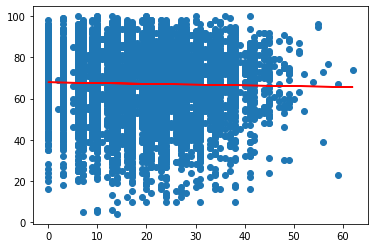

In [204]:
plt.plot(homeWinsHumidity['score_away'],homeWinsHumidity['weather_humidity'], 'o', label='original data')
plt.plot(homeWinsHumidity['score_away'], intercept + slope*homeWinsHumidity['score_away'], 'r', label='fitted line')

As with temperature vs score shere is a greater correlation with away team scores (-0.024) and humidity than home team scores (-0.016). Also the correlation is still a weak one since the r value is less than -0.2. 

The difference with humidity is that the corelations are negative. This implies that when humidity increases there is a slight correlation that the away team score will decrease, and when humidity decreases the away team score will increase. Therefore away teams may have a harder time playing in higher humidity, though the correlation is very small.

In [205]:
gamesStadiumsOutdoors

,scoreDiff
weather_temperatureRounded,
-10.0,8.000000
0.0,6.470588
10.0,4.620000
20.0,4.163212
30.0,3.643721
40.0,3.314413
50.0,3.210188
60.0,2.785781
70.0,2.413257


In [70]:
spearmanr(gamesStadiumsOutdoors.index,gamesStadiumsOutdoors['scoreDiff'])

SpearmanrResult(correlation=-1.0, pvalue=0.0)

In [71]:
linregress(gamesStadiumsOutdoors.index,gamesStadiumsOutdoors['scoreDiff'])

LinregressResult(slope=-0.07694454768644805, intercept=6.469348432138689, rvalue=-0.8729729220617474, pvalue=0.0004508462366186406, stderr=0.014330776625941991)

In [72]:
gameOutdoorsAll = gamesStadiums[gamesStadiums['stadium_type'] == 'outdoor']

In [73]:
spearmanr(gameOutdoorsAll['weather_temperature'],gameOutdoorsAll['scoreDiff'])

SpearmanrResult(correlation=-0.03496960967471455, pvalue=0.0008134841234426065)

In [74]:
linregress(gameOutdoorsAll['weather_temperature'],gameOutdoorsAll['scoreDiff'])

LinregressResult(slope=-0.03628070103071584, intercept=5.088652322235415, rvalue=-0.0380269952131704, pvalue=0.00027147746194348737, stderr=0.009960342736445959)

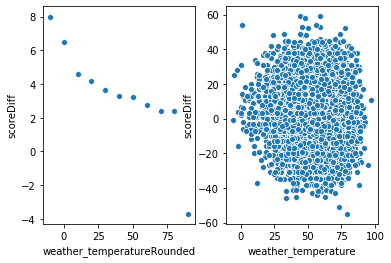

In [75]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=gamesStadiumsOutdoors.index,y='scoreDiff',data=gamesStadiumsOutdoors)
plt.subplot(1, 2, 2)
sns.scatterplot(x='weather_temperature',y='scoreDiff',data=gameOutdoorsAll)

There is a negative correlation between outdoor stadium temperatures and the score difference when taking the mean difference for each binned weather temperature. The r value for these two is -0.87. This is a indicts a strong correlation that as temperature decreases the score difference increases. Also the Spearman correlation for the two is -1.0. This shows a strong negative correlation between the temperature and score difference.

Though when you test the correlation for all the games seperately without binning the correlation drops to -0.04 and -0.04 for both correlation test. This shows a big shift towards no correlation. 

A factor for this shift is with binning and taking the mean of each there is a larger impact of outliers and one off differences. A majority of the points for all games is in clustered in the middle with a few outliers at the ends. when just taking the mean of each binned temperature the number of points in each gets negated. This allows the outliers to have a greater effect on the results. 

In [76]:
gameOutdoorsAll['scoreDiff']

0        -9.0
1        38.0
2        20.0
3        -5.0
4        21.0
         ... 
11870    -1.0
11871    18.0
11872     8.0
11873    13.0
11875    -6.0
Name: scoreDiff, Length: 9164, dtype: float64

In [77]:
meanScore = gameOutdoorsAll['scoreDiff'].mean()
meanScore

3.093736359668267

In [78]:
stdScore = gameOutdoorsAll['scoreDiff'].std()
stdScore

14.915127784545444

In [79]:
meanWeather = gameOutdoorsAll['weather_temperature'].mean()
meanWeather

54.98559580969009

In [80]:
stdWeather = gameOutdoorsAll['weather_temperature'].std()
stdWeather

15.633035656795911

In [211]:
scoreDiffCorrelation = homeWinsHumidity.drop(columns=['homeWin','AwayWin','schedule_season'])

In [216]:
scoreDiffCorrelation = scoreDiffCorrelation.pivot_table(index='scoreDiff',aggfunc=np.mean)

In [230]:
scoreDiffCorrelation.head()

,score_away,score_home,weather_humidity,weather_humidityRounded,weather_temperature,weather_temperatureRounded,weather_wind_mph
scoreDiff,,,,,,,
-55.0,62.0,7.0,74.0,70.0,79.0,70.0,6.0
-51.0,51.0,0.0,83.0,80.0,73.0,70.0,8.0
-46.0,56.0,10.0,73.0,70.0,34.0,30.0,10.0
-45.0,52.0,7.0,35.5,30.0,52.0,50.0,11.5
-44.0,44.0,0.0,83.0,80.0,57.0,50.0,10.0


In [237]:
spearmanr(scoreDiffCorrelation['weather_temperature'],scoreDiffCorrelation['score_away'])

SpearmanrResult(correlation=0.3561484656401789, pvalue=0.00023894999669376698)

In [228]:
corr_type, corr_matrix, corr_ps = rp.corr_case(scoreDiffCorrelation)

In [229]:
corr_matrix

,score_away,score_home,weather_humidity,weather_humidityRounded,weather_temperature,weather_temperatureRounded,weather_wind_mph
score_away,1,-0.8952,-0.1005,-0.0707,0.3121,0.3151,-0.2959
score_home,-0.8952,1,0.1354,0.1116,-0.3104,-0.3273,0.1805
weather_humidity,-0.1005,0.1354,1,0.9891,-0.0469,-0.0859,-0.1445
weather_humidityRounded,-0.0707,0.1116,0.9891,1,-0.0227,-0.0603,-0.1387
weather_temperature,0.3121,-0.3104,-0.0469,-0.0227,1,0.9803,-0.067
weather_temperatureRounded,0.3151,-0.3273,-0.0859,-0.0603,0.9803,1,-0.0598
weather_wind_mph,-0.2959,0.1805,-0.1445,-0.1387,-0.067,-0.0598,1


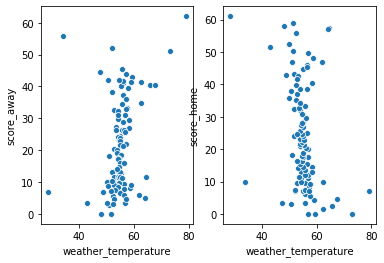

In [247]:
plt.subplot(1, 2, 1)
sns.scatterplot(scoreDiffCorrelation['weather_temperature'],scoreDiffCorrelation['score_away'])
plt.subplot(1, 2, 2)
sns.scatterplot(scoreDiffCorrelation['weather_temperature'],scoreDiffCorrelation['score_home'])

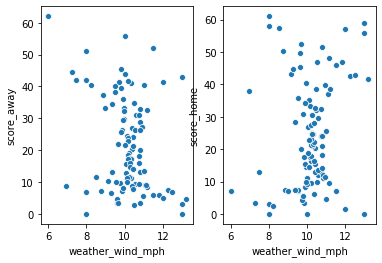

In [242]:
plt.subplot(1, 2, 1)
sns.scatterplot(scoreDiffCorrelation['weather_wind_mph'],scoreDiffCorrelation['score_away'])
plt.subplot(1, 2, 2)
sns.scatterplot(scoreDiffCorrelation['weather_wind_mph'],scoreDiffCorrelation['score_home'])

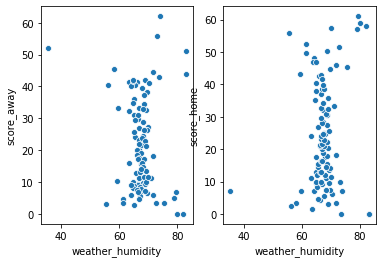

In [248]:
plt.subplot(1, 2, 1)
sns.scatterplot(scoreDiffCorrelation['weather_humidity'],scoreDiffCorrelation['score_away'])
plt.subplot(1, 2, 2)
sns.scatterplot(scoreDiffCorrelation['weather_humidity'],scoreDiffCorrelation['score_home'])

In [206]:
outdoorCorrelation = homeWinsHumidity.drop(columns=['homeWin','AwayWin','schedule_season'])

In [207]:
outdoorCorrelation

,stadium_type,weather_temperature,weather_temperatureRounded,weather_humidity,weather_wind_mph,score_home,score_away,scoreDiff,weather_humidityRounded
0,outdoor,83.0,80.0,71.0,6.0,14.0,23.0,-9.0,70.0
1,outdoor,81.0,80.0,70.0,7.0,45.0,7.0,38.0,70.0
2,outdoor,70.0,70.0,82.0,7.0,27.0,7.0,20.0,80.0
3,outdoor,82.0,80.0,78.0,11.0,14.0,19.0,-5.0,70.0
4,outdoor,64.0,60.0,62.0,8.0,24.0,3.0,21.0,60.0
...,...,...,...,...,...,...,...,...,...
10537,outdoor,71.0,70.0,16.0,8.0,14.0,34.0,-20.0,10.0
10538,outdoor,41.0,40.0,93.0,7.0,20.0,7.0,13.0,90.0
10539,outdoor,73.0,70.0,14.0,2.0,27.0,24.0,3.0,10.0
10540,outdoor,44.0,40.0,93.0,5.0,27.0,9.0,18.0,90.0


In [208]:
corr_type, corr_matrix, corr_ps = rp.corr_case(outdoorCorrelation)

In [209]:
corr_type

,Pearson correlation test using list-wise deletion
0,Total observations used = 8240


In [210]:
corr_matrix

,weather_temperature,weather_temperatureRounded,weather_humidity,weather_wind_mph,score_home,score_away,scoreDiff,weather_humidityRounded
weather_temperature,1,0.983,-0.0034,-0.1976,-0.0166,0.0386,-0.0379,-0.0005
weather_temperatureRounded,0.983,1,-0.0038,-0.1967,-0.0132,0.0396,-0.0362,0
weather_humidity,-0.0034,-0.0038,1,0.0174,-0.0153,-0.0226,0.0045,0.9839
weather_wind_mph,-0.1976,-0.1967,0.0174,1,-0.0537,-0.0838,0.0189,0.015
score_home,-0.0166,-0.0132,-0.0153,-0.0537,1,-0.0414,0.735,-0.0143
score_away,0.0386,0.0396,-0.0226,-0.0838,-0.0414,1,-0.7079,-0.0207
scoreDiff,-0.0379,-0.0362,0.0045,0.0189,0.735,-0.7079,1,0.004
weather_humidityRounded,-0.0005,0,0.9839,0.015,-0.0143,-0.0207,0.004,1


In [164]:
corr_ps

,weather_temperature,weather_temperatureRounded,weather_humidity,score_home,score_away,scoreDiff,weather_humidityRounded
weather_temperature,0.0000,0.0000,0.7542,0.1317,0.0005,0.0006,0.9622
weather_temperatureRounded,0.0000,0.0000,0.7336,0.2294,0.0003,0.0010,0.9973
weather_humidity,0.7542,0.7336,0.0000,0.1652,0.0405,0.6827,0.0000
score_home,0.1317,0.2294,0.1652,0.0000,0.0002,0.0000,0.1937
score_away,0.0005,0.0003,0.0405,0.0002,0.0000,0.0000,0.0597
scoreDiff,0.0006,0.0010,0.6827,0.0000,0.0000,0.0000,0.7197
weather_humidityRounded,0.9622,0.9973,0.0000,0.1937,0.0597,0.7197,0.0000


<h2> Normal Distribution

In [81]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1,n+1) / n
    return(x,y)

In [82]:
scoreSamples = np.random.normal(meanScore,stdScore,size=10000)

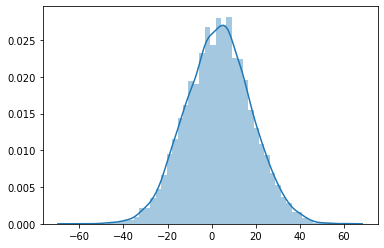

In [83]:
sns.distplot(scoreSamples)

In [84]:
x, y = ecdf(gameOutdoors['scoreDiff'])

NameError: name 'gameOutdoors' is not defined

In [ ]:
xtheory , ytheory = ecdf(scoreSamples)

In [ ]:
sns.lineplot(xtheory, ytheory)
sns.lineplot(x,y,marker='.',linestyle='none')

In [ ]:
weatherSamples = np.random.normal(meanWeather,stdWeather,size=10000)

In [ ]:
sns.distplot(weatherSamples)

In [85]:
x, y = ecdf(gameOutdoors['weather_temperature'])

NameError: name 'gameOutdoors' is not defined

In [86]:
xtheory , ytheory = ecdf(weatherSamples)

NameError: name 'weatherSamples' is not defined

In [87]:
sns.lineplot(xtheory, ytheory)
sns.lineplot(x,y,marker='.',linestyle='none')

NameError: name 'xtheory' is not defined

Data is normal distributed

<h3> Conclusion

After using statistical analysis to test correlations, only a very slight correlation was made between weather conditions and an advantage. There was a slight correlation that away teams perform worse in more extreme weather conditions, but the correlation value was too small to infer a strong connected between the two. 